# Exploratory Data Analysis

Here we are going to take a deeper look into the properties of the dataset we have at hand. Because the data provided is not public, a new reduced dataset was created and will be used here.

In [1]:
import os
import pandas as pd
import datetime as dt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


pd.set_option("display.max_columns", None)

C:\Users\nicol\Anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\nicol\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
C:\Users\nicol\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
# Open the dataset
dataset_folder = 'eBay_ML_Challenge_Dataset_2021'
os.chdir(dataset_folder)

tsv_file = open("train reduced fake.csv", encoding='utf-8')
df = pd.read_csv(tsv_file)

In [3]:
# Check for missing values
df.isna().sum()

b2c_c2c                        0
seller_id                      0
declared_handling_days       546
acceptance_scan_timestamp      0
shipment_method_id             0
shipping_fee                   0
carrier_min_estimate           0
carrier_max_estimate           0
item_zip                       0
buyer_zip                      0
category_id                    0
item_price                     0
quantity                       0
payment_datetime               0
delivery_date                  0
weight                         0
weight_units                   0
package_size                   0
record_number                  0
dtype: int64

It looks good for now, only a few missing values

In [4]:
# formatting the timestamps to datetime instead of strings
df['acceptance_scan_timestamp'] = pd.to_datetime(df['acceptance_scan_timestamp'], format = '%Y-%m-%d %H:%M:%S')
df['payment_datetime'] = pd.to_datetime(df['payment_datetime'], format = '%Y-%m-%d %H:%M:%S')
df['delivery_date'] = pd.to_datetime(df['delivery_date'], format = '%Y-%m-%d')

df.head(10)

,b2c_c2c,seller_id,declared_handling_days,acceptance_scan_timestamp,shipment_method_id,shipping_fee,carrier_min_estimate,carrier_max_estimate,item_zip,buyer_zip,category_id,item_price,quantity,payment_datetime,delivery_date,weight,weight_units,package_size,record_number
0,B2C,25454,3.0,2019-03-26 15:11:00-07:00,0,0.00,3,5,97219,49040,13,27.95,1,2019-03-24 03:56:49-07:00,2019-03-29,5,1,LETTER,1
1,C2C,6727381,2.0,2018-06-02 12:53:00-07:00,0,3.00,3,5,11415-3528,62521,0,20.50,1,2018-06-01 13:43:54-07:00,2018-06-05,0,1,PACKAGE_THICK_ENVELOPE,2
2,B2C,18507,1.0,2019-01-07 16:22:00-05:00,0,4.50,3,5,27292,53010,1,19.90,1,2019-01-06 00:02:00-05:00,2019-01-10,9,1,PACKAGE_THICK_ENVELOPE,3
3,B2C,4677,1.0,2018-12-17 16:56:00-08:00,0,0.00,3,5,90703,80022,1,35.50,1,2018-12-16 10:28:28-08:00,2018-12-21,8,1,PACKAGE_THICK_ENVELOPE,4
4,B2C,4677,1.0,2018-07-27 16:48:00-07:00,0,0.00,3,5,90703,55070,1,25.00,1,2018-07-26 18:20:02-07:00,2018-07-30,3,1,PACKAGE_THICK_ENVELOPE,5
5,B2C,10514,1.0,2019-04-19 19:42:00-04:00,0,0.00,3,5,43215,77063,3,10.39,1,2019-04-18 14:11:09-04:00,2019-04-22,1,1,PACKAGE_THICK_ENVELOPE,6
6,B2C,104,1.0,2019-02-08 17:35:00-08:00,0,0.00,3,5,91304,60565,11,5.70,1,2019-02-08 09:33:13-08:00,2019-02-11,0,1,PACKAGE_THICK_ENVELOPE,7
7,B2C,340356,1.0,2018-04-23 17:31:00-04:00,0,2.95,3,5,49735,29379,1,6.00,1,2018-04-22 18:32:04-04:00,2018-04-25,1,1,PACKAGE_THICK_ENVELOPE,8
8,B2C,113915,5.0,2019-10-12 09:22:00-04:00,3,0.00,2,8,43606,32958,18,5.55,1,2019-10-11 04:54:25-04:00,2019-10-15,0,1,NONE,9
9,B2C,130301,1.0,2019-08-09 11:24:00-05:00,1,0.00,2,5,35117,84776,13,59.98,1,2019-08-08 12:47:14-05:00,2019-08-12,112,1,PACKAGE_THICK_ENVELOPE,10


In [5]:
# Fixing the missing handling time values
df['true handling time'] = df['acceptance_scan_timestamp'] - df['payment_datetime']
df['declared_handling_days'].fillna(-1, inplace = True)

df.isna().sum()

b2c_c2c                      0
seller_id                    0
declared_handling_days       0
acceptance_scan_timestamp    0
shipment_method_id           0
shipping_fee                 0
carrier_min_estimate         0
carrier_max_estimate         0
item_zip                     0
buyer_zip                    0
category_id                  0
item_price                   0
quantity                     0
payment_datetime             0
delivery_date                0
weight                       0
weight_units                 0
package_size                 0
record_number                0
true handling time           0
dtype: int64

In [6]:
# Check all columns and convert the values on numerical columns
for column in df.columns.tolist():
    print(column)

df['shipment_method_id'] = df['shipment_method_id'].astype(int)
df['shipping_fee'] = df['shipping_fee'].astype(float)
df['carrier_min_estimate'] = df['carrier_min_estimate'].astype(int)
df['carrier_max_estimate'] = df['carrier_max_estimate'].astype(int)
df['category_id'] = df['category_id'].astype(int)
df['item_price'] = df['item_price'].astype(float)
df['quantity'] = df['quantity'].astype(int)
df['weight'] = df['weight'].astype(int)
df['declared_handling_days'] = df['declared_handling_days'].astype(int)

b2c_c2c
seller_id
declared_handling_days
acceptance_scan_timestamp
shipment_method_id
shipping_fee
carrier_min_estimate
carrier_max_estimate
item_zip
buyer_zip
category_id
item_price
quantity
payment_datetime
delivery_date
weight
weight_units
package_size
record_number
true handling time


In [7]:
# Check data types after conversion
df.dtypes

b2c_c2c                               object
seller_id                              int64
declared_handling_days                 int32
acceptance_scan_timestamp             object
shipment_method_id                     int32
shipping_fee                         float64
carrier_min_estimate                   int32
carrier_max_estimate                   int32
item_zip                              object
buyer_zip                             object
category_id                            int32
item_price                           float64
quantity                               int32
payment_datetime                      object
delivery_date                 datetime64[ns]
weight                                 int32
weight_units                           int64
package_size                          object
record_number                          int64
true handling time           timedelta64[ns]
dtype: object

In [8]:
# Verify number of existing classes for each of the string variables
for column in df.columns.tolist():
    if df[column].dtype == 'object':
        print(column)
        print(len(df[column].unique().tolist()))

b2c_c2c
2
acceptance_scan_timestamp
9848
item_zip
4701
buyer_zip
6880
payment_datetime
9998
package_size
5


In [9]:
# Verify number of existing 'classes' for each of the integer-valued variables
for column in df.columns.tolist():
    if df[column].dtype == 'int':
        print(column)
        print(len(df[column].unique().tolist()))

declared_handling_days
11
shipment_method_id
14
carrier_min_estimate
4
carrier_max_estimate
5
category_id
32
quantity
14
weight
133


declared_handling_days 0
-1.0 5.0
shipping_fee 1
0.0 20.65150000000003
carrier_min_estimate 2
2.0 3.0
carrier_max_estimate 3
5.0 9.0
item_price 4
1.0 335.0999000000022
weight 5
0.0 160.02000000000044


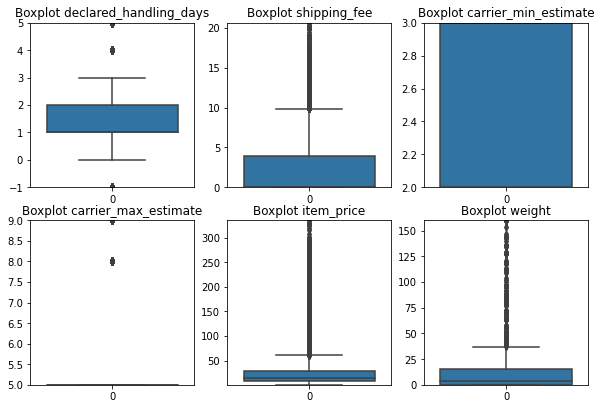

In [10]:
# Boxplot of values of real valued variables
grid_size = 3
fig, axs = plt.subplots(2, grid_size,  figsize = (10,6.66))

quant_columns = ['declared_handling_days', 'shipping_fee', 'carrier_min_estimate', 'carrier_max_estimate', 'item_price', 'weight']

ax_counter = 0 
for column in quant_columns:
    if df[column].dtype == 'int' or df[column].dtype == 'float':
        #sns.boxplot()
        print(column, ax_counter)
        sns.boxplot(data=df[column], ax = axs[ax_counter//grid_size, ax_counter%grid_size])
        axs[ax_counter//grid_size, ax_counter%grid_size].set_title('Boxplot ' + column)
        
        #Exclude super outliers so visualization is better
        q1 = df[column].quantile(0.01)
        q2 = df[column].quantile(0.99)
        axs[ax_counter//grid_size, ax_counter%grid_size].set_ylim(q1, q2)
        
        print(q1, q2)
        ax_counter += 1
        
#fig.savefig('Boxplots.png', dpi = 300)

C:\Users\nicol\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated infavour of `both` or `neither`.
  # Remove the CWD from sys.path while we load stuff.


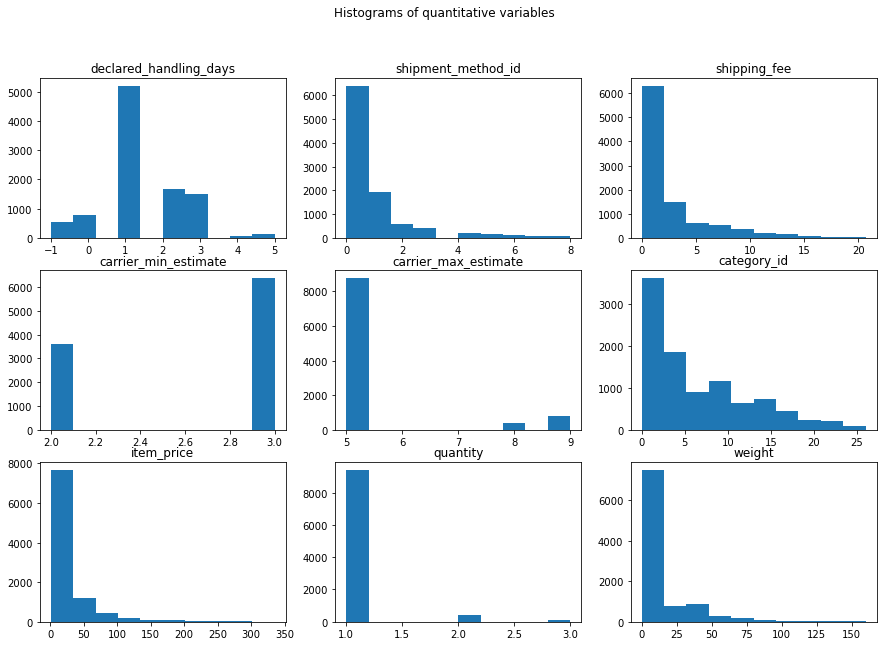

In [11]:
# Histogram of values of quantitative variables
grid_size = 3
fig, axs = plt.subplots(grid_size,grid_size, figsize = (15,10))
fig.suptitle('Histograms of quantitative variables')

ax_counter = 0 
for column in df.columns.tolist():
    if df[column].dtype == 'int' or df[column].dtype == 'float':
        #Exclude super outliers so visualization is better
        iqr = df[column][df[column].between(df[column].quantile(0.01), df[column].quantile(0.99), inclusive=True)]
        
        axs[ax_counter//grid_size, ax_counter%grid_size].hist(iqr)
        axs[ax_counter//grid_size, ax_counter%grid_size].set_title(column)
        
        ax_counter += 1

#fig.savefig('Histograms continuous.png', dpi = 300)

C:\Users\nicol\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator


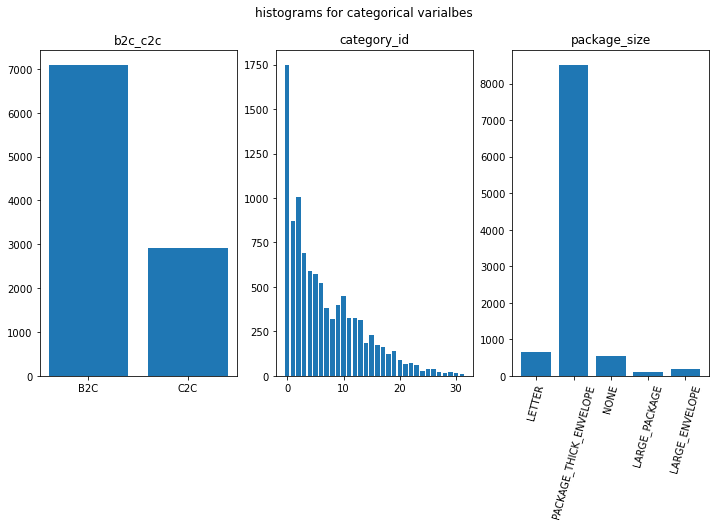

In [12]:
# Barplots for qualitative variables
grid_size = 3
fig, axs = plt.subplots(1,3, figsize = (12,6))

fig.suptitle('histograms for categorical varialbes')

qual_columns = ['b2c_c2c', 'category_id', 'package_size']

ax_counter = 0 
for column in qual_columns:
    values_list = []
    count_list = []
    for value in df[column].unique().tolist():
        values_list.append(value)
        tmp = df[column]
        count_list.append(len(tmp.loc[np.where(tmp == value)]))
        
    
    try:
        axs[ax_counter].bar(values_list, count_list)
        axs[ax_counter].set_title(column)
        if column == 'package_size':
            axs[ax_counter].set_xticklabels(labels = values_list, rotation = 75)
    except:
        axs2.bar(values_list, count_list)
        axs2.set_title('Barplot ' + column)
        axs2.set_xticklabels(labels = values_list, rotation = 45)

    ax_counter += 1

#fig.savefig('Histograms categorical.png', dpi = 300)